# **Predictive Analysis of Heart Disease Using Machine Learning**

Heart disease remains one of the leading causes of mortality worldwide, necessitating early detection and prevention strategies. This project aims to leverage the Heart Attack Analysis & Prediction Dataset to develop a predictive model for heart disease. By analyzing demographic and clinical parameters, such as age, sex, chest pain type, and serum cholesterol, among others, we seek to identify significant predictors of heart disease. This analysis is crucial for understanding risk factors and improving patient outcomes through early intervention.


In [ ]:
# Import necessary libraries

# Suppress warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis libraries
import pandas as pd  # For handling dataframes
import numpy as np   # For numerical operations
import itertools

# Visualization libraries
import matplotlib.pyplot as plt  # For static plotting
import seaborn as sns            # For statistical plots
import plotly.express as px      # For interactive plots
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Set default aesthetics for seaborn plots
sns.set_theme(style="whitegrid")  # This sets the theme for seaborn plots.

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
# Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive at the specified mount point (/content/drive).
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the base directory where the dataset is located
data_dir = "/content/drive/MyDrive/Classwork/Data 606/data/"

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_dir + "heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Cleaning & Preparation

### Dataset Overview - General Information

In [ ]:
# Display the number of rows and columns in the DataFrame
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display the number of missing values in each column
print("Number of missing values in each column:")
print(df.isnull().sum())
print("\n")  # Adding a newline for better readability in output

# Display the names of the columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns.tolist())
print("\n")  # Adding a newline for better readability in output

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)
print("\n")  # Adding a newline for better readability in output

# Display a concise summary of the DataFrame, including the non-null count and data type of each column
print("Concise summary of the DataFrame:")
df.info()

The dataset has 303 rows and 14 columns.

Number of missing values in each column:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Columns in the DataFrame:
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


Data types of each column:
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       30

### Data Exploration - Identifying Unique Values in Each Column

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


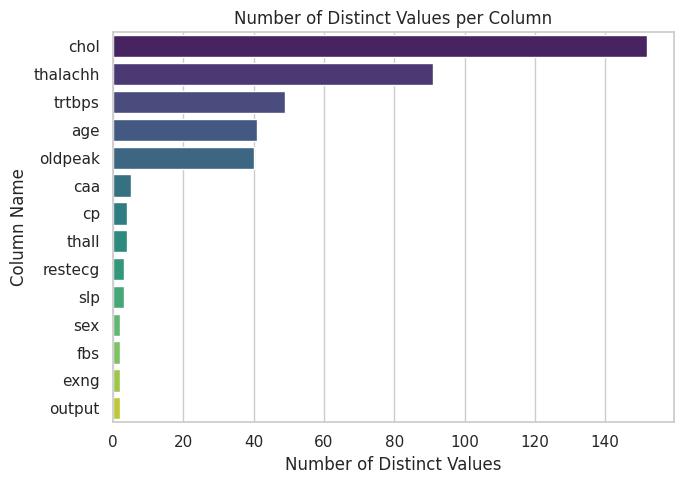

In [ ]:
distinct_values_count = {}

# Loop through each column in the DataFrame to count distinct values
for column in df.columns:
    # Calculate the number of unique values in the column
    num_distinct_values = len(df[column].unique())

    # Store the count in the dictionary with the column name as the key
    distinct_values_count[column] = num_distinct_values

    # Print the column name and its number of distinct values
    print(f"{column}: {num_distinct_values} distinct values")

# Visualization of the distinct value counts for each column
# Convert the dictionary to a DataFrame for easier plotting
distinct_values_df = pd.DataFrame(list(distinct_values_count.items()), columns=['Column', 'Distinct Values'])

# Sort the DataFrame by the number of distinct values to make the plot more informative
distinct_values_df = distinct_values_df.sort_values(by='Distinct Values', ascending=False)

# Create a bar plot showing the number of distinct values in each column
plt.figure(figsize=(7, 5))
sns.barplot(x='Distinct Values', y='Column', data=distinct_values_df, palette='viridis')
plt.title('Number of Distinct Values per Column')
plt.xlabel('Number of Distinct Values')
plt.ylabel('Column Name')
plt.tight_layout()  # Adjust the layout to make room for the labels

# Show the plot
plt.show()

### Data Cleaning - Handling Duplicate Entries

In [ ]:
# Identify duplicate rows in the DataFrame
duplicate_rows_data = df[df.duplicated()]

# Display the number of duplicate rows found
print(f"Number of duplicate rows: {duplicate_rows_data.shape[0]}")

# Drop the duplicate rows from the DataFrame
df = df.drop_duplicates()

# Print a confirmation message after removing duplicates
print("Duplicate rows have been removed.")
print(f"The dataset now has {df.shape[0]} rows and {df.shape[1]} columns.")

Number of duplicate rows: 1
Duplicate rows have been removed.
The dataset now has 302 rows and 14 columns.


### Data Exploration - Checking for Missing Values

In [ ]:
# Calculate the percentage of missing values for each column in the DataFrame
data_na = (df.isnull().sum() / len(df)) * 100

# Remove columns with 0% missing values and sort the remaining columns by their percentage of missing values in descending order
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]

# Create a DataFrame to display the missing value percentages in a more readable format
missing_data = pd.DataFrame({'Missing Ratio': data_na})

# Display the top 20 columns with the highest missing value ratios
print("Displaying the top 20 columns with the highest percentage of missing values:")
print(missing_data.head(20))

Displaying the top 20 columns with the highest percentage of missing values:
Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [ ]:
# Data Cleaning - Replacing Values in the 'thall' Column

# Replace the value 0 with 2 in the 'thall' column of the DataFrame
df['thall'] = df['thall'].replace(0, 2)

# Print a confirmation message after replacing the values
print("In the 'thall' column, all occurrences of 0 have been replaced with 2.")

In the 'thall' column, all occurrences of 0 have been replaced with 2.


### Data Transformation - Mapping Numerical Values to Categorical Descriptions

In [ ]:
# Mapping for 'cp' (chest pain type) column
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)
print("Mapping for 'cp' column applied: 0='typical angina', 1='atypical angina', 2='non-anginal pain', 3='asymptomatic'\n")

# Mapping for 'slp' (slope of the peak exercise ST segment) column
slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slp'] = df['slp'].map(slp_mapping)
print("Mapping for 'slp' column applied: 0='unsloping', 1='flat', 2='downsloping'\n")

# Mapping for 'thall' (thalassemia) column
thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thall'] = df['thall'].map(thall_mapping)
print("Mapping for 'thall' column applied: 1='fixed defect', 2='normal', 3='reversible defect'\n")

# Mapping for 'rest_ecg' (resting electrocardiographic results) column
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)
print("Mapping for 'restecg' column applied: 0='normal', 1='ST-T wave abnormality', 2='left ventricular hypertrophy'\n")

# Mapping for 'sex' column
sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)
print("Mapping for 'sex' column applied: 0='female', 1='male'")

Mapping for 'cp' column applied: 0='typical angina', 1='atypical angina', 2='non-anginal pain', 3='asymptomatic'

Mapping for 'slp' column applied: 0='unsloping', 1='flat', 2='downsloping'

Mapping for 'thall' column applied: 1='fixed defect', 2='normal', 3='reversible defect'

Mapping for 'restecg' column applied: 0='normal', 1='ST-T wave abnormality', 2='left ventricular hypertrophy'

Mapping for 'sex' column applied: 0='female', 1='male'


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
def plot_distribution(data, column, plot_type):
    """
    This function plots the distribution of a numerical column in the DataFrame.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    column (str): The name of the column to plot.
    plot_type (str): The type of plot to create ('histogram' or 'boxplot').
    """
    fig, ax = plt.subplots()
    if plot_type == 'histogram':
        sns.histplot(data[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
    elif plot_type == 'boxplot':
        sns.boxplot(x=data[column], ax=ax)
        ax.set_title(f'Box Plot of {column}')
    plt.show()

def plot_categorical(data, column):
    """
    This function plots the distribution of a categorical column in the DataFrame.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    column (str): The name of the column to plot.
    """
    fig, ax = plt.subplots()
    value_counts = data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.set_title(f'Distribution of {column}')
    plt.show()

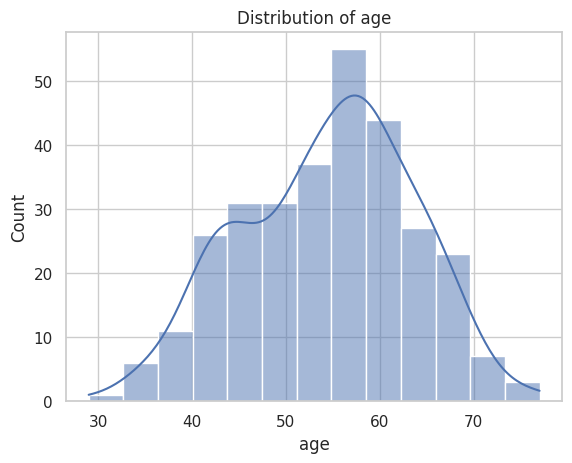

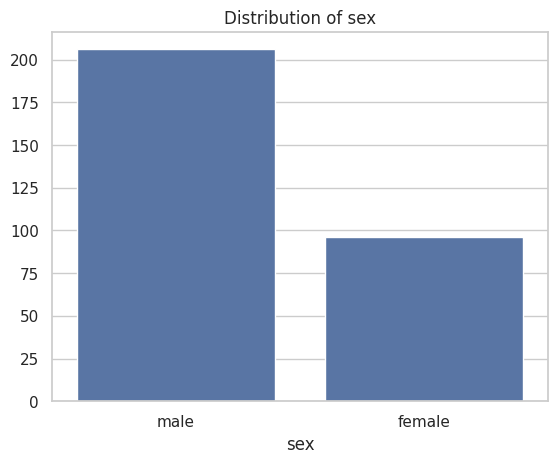

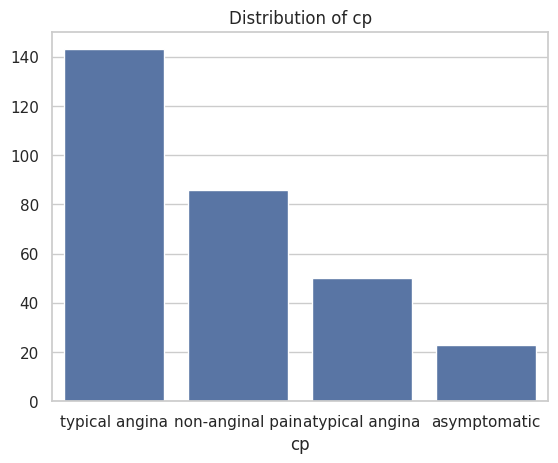

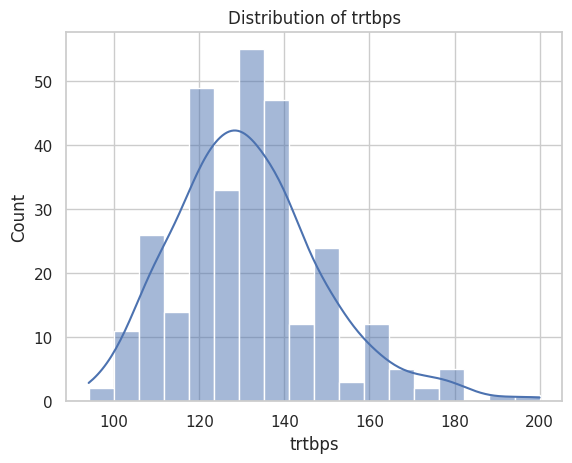

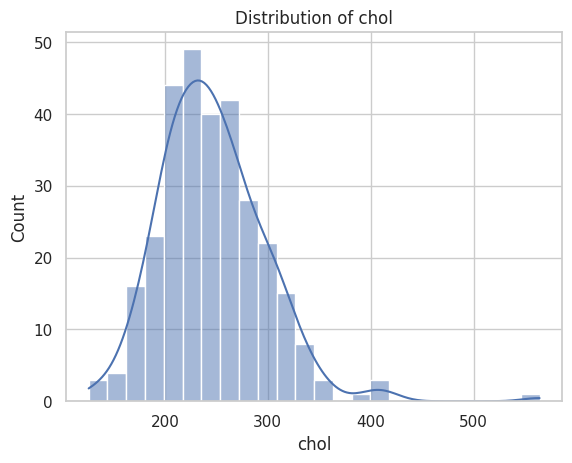

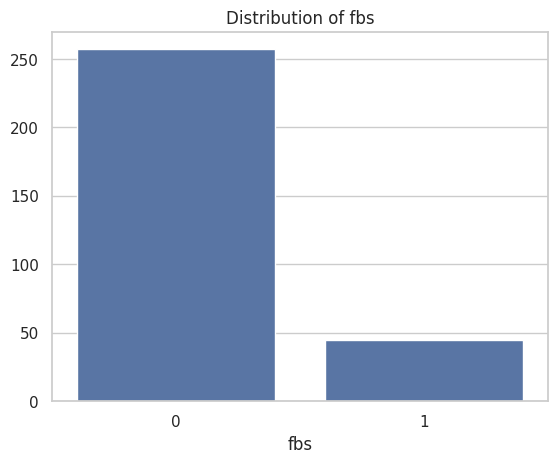

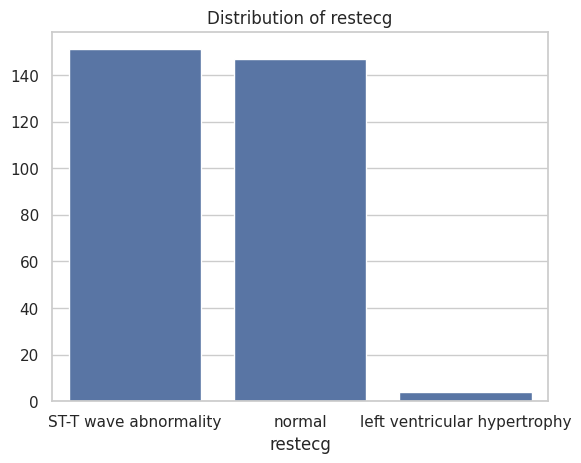

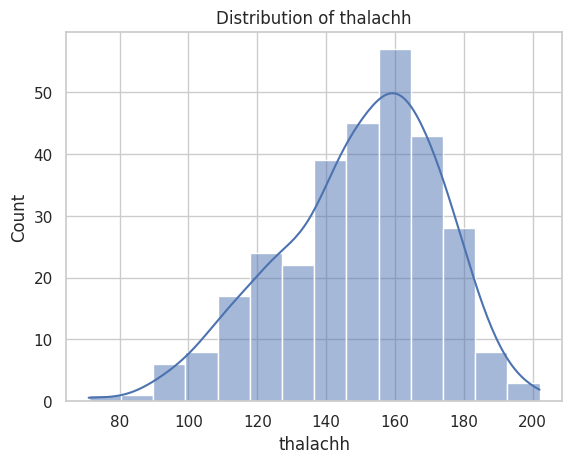

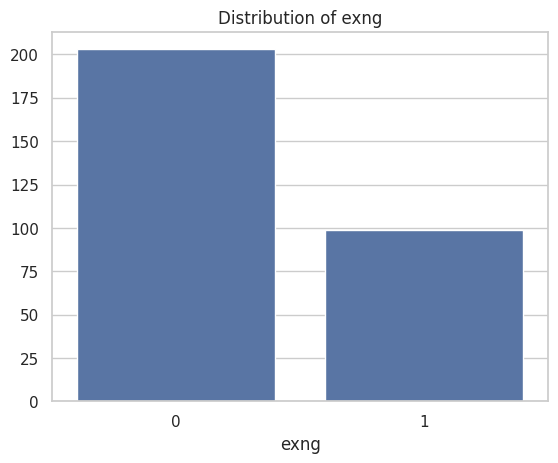

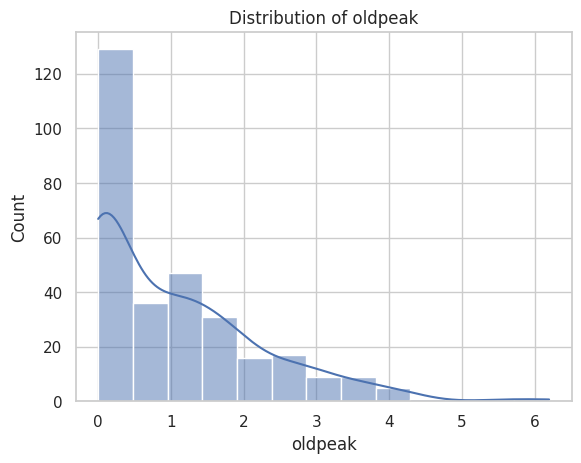

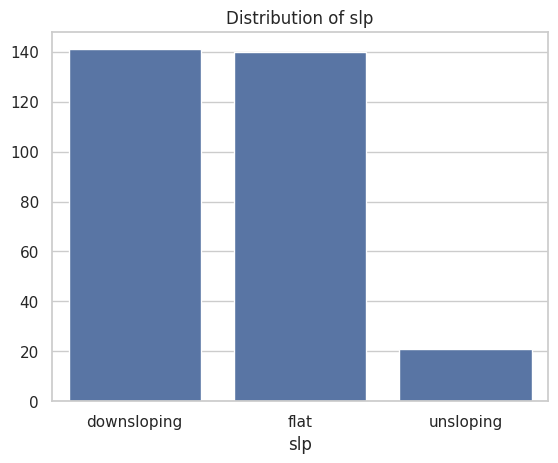

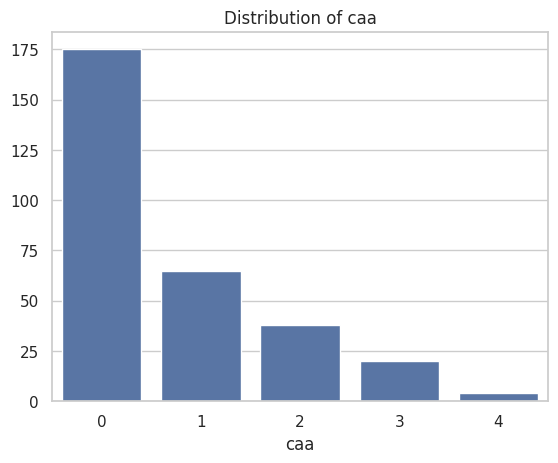

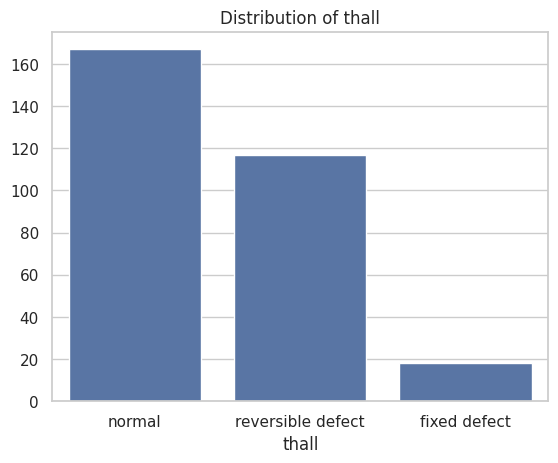

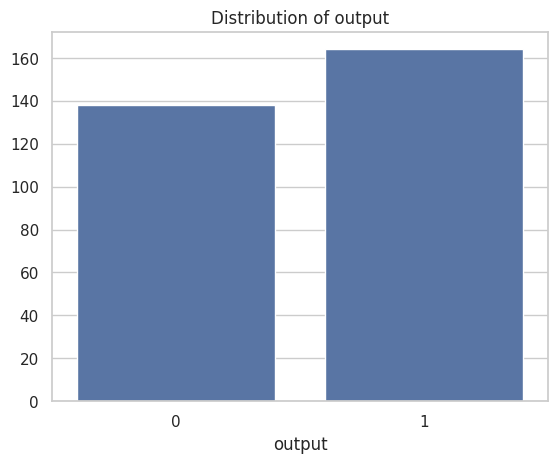

In [ ]:
# Loop through each column in the DataFrame and plot the distribution
for column in df.columns:
    if df[column].dtype == 'object' or len(df[column].unique()) <= 10:
        plot_categorical(df, column)
    else:
        # Using a simple heuristic: if unique values are more than 10% of total, use histogram; otherwise, use boxplot.
        plot_type = 'histogram' if len(df[column].unique()) > len(df) * 0.1 else 'boxplot'
        plot_distribution(df, column, plot_type)

## Bivariate Analysis

In [ ]:
# Visualize the relationship between chest pain type and target
cp_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
fig = px.bar(cp_target, title='Chest Pain Type vs Target', labels={'value': 'Number of Patients', 'cp': 'Chest Pain Type'})
fig.show()

# Visualize the relationship between age and maximum heart rate achieved
fig = px.scatter(df, x='age', y='thalachh', trendline='ols', title='Age vs Maximum Heart Rate Achieved', labels={'age': 'Age', 'thalachh': 'Maximum Heart Rate Achieved'})
fig.show()

# Visualize resting blood pressure differences across sexes
fig = px.box(df, x='sex', y='trtbps', title='Resting Blood Pressure for Different Sexes', labels={'trtbps': 'Resting Blood Pressure', 'sex': 'Sex'})
fig.show()

# Visualize cholesterol level differences across sexes
fig = px.box(df, x='sex', y='chol', title='Cholesterol for Different Sexes', labels={'chol': 'Cholesterol', 'sex': 'Sex'})
fig.show()

# Visualize maximum heart rate differences across chest pain types
fig = px.box(df, x='cp', y='thalachh', title='Maximum Heart Rate achieved for Different Chest Pain Types', labels={'thalachh': 'Maximum Heart Rate achieved', 'cp': 'Chest Pain Type'})
fig.show()

# Visualize cholesterol level differences across chest pain types
fig = px.box(df, x='cp', y='chol', title='Cholesterol Levels for Different Chest Pain Types', labels={'chol': 'Cholesterol Level', 'cp': 'Chest Pain Type'})
fig.show()

# Visualize cholesterol levels based on fasting blood sugar status
fig = px.box(df, x='fbs', y='chol', title='Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl', labels={'chol': 'Cholesterol Level', 'fbs': 'Fasting Blood Sugar > 120 mg/dl'})
fig.show()

# Visualize the relationship between exercise-induced angina and target
exang_target = df.groupby(['exng', 'output']).size().unstack().fillna(0)
fig = px.bar(exang_target, title='Exercise Induced Angina vs Target', labels={'value': 'Number of Patients', 'exng': 'Exercise Induced Angina'})
fig.show()

# Visualize the relationship between resting ECG results and target
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
fig = px.bar(restecg_target, title='Resting ECG Results vs Target', labels={'value': 'Number of Patients', 'restecg': 'Rest ECG Results'})
fig.show()

# Visualize the relationship between sex and target
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
fig = px.bar(sex_target, title='Sex vs Target', labels={'value': 'Number of Patients', 'sex': 'Sex'})
fig.show()

# Visualize the relationship between the number of major vessels and target
ca_target = df.groupby(['cp', 'output']).size().unstack().fillna(0)
fig = px.bar(ca_target, title='Number of Major Vessels vs Target', labels={'value': 'Number of Patients', 'cp': 'Number of Major Vessels'})
fig.show()

# Visualize the relationship between fasting blood sugar status and target
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fig = px.bar(fbs_target, title='Fasting Blood Sugar > 120 mg/dl vs Target', labels={'value': 'Number of Patients', 'fbs': 'Fasting Blood Sugar > 120 mg/dl'})
fig.show()

# Visualize resting blood pressure differences across chest pain types
fig = px.box(df, x='cp', y='trtbps', title='Resting Blood Pressure for Different Chest Pain Types', labels={'trtbps': 'Resting Blood Pressure', 'cp': 'Chest Pain Type'})
fig.show()

# Correlation Analysis

In [ ]:
# Data Preprocessing and Correlation Analysis

# Step 1: Select Columns
data = df.copy()
categorical_columns = ['sex', 'cp', 'restecg', 'slp', 'thall']
numerical_columns = ['age', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa', 'output']

# Create dummy variables for categorical columns
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

# Step 2: Preprocessing and Scaling the Data
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical data into a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Step 3: Dealing with Categorical Variables
# Drop the original numerical columns from dummy_variables to avoid duplication
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables with the scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

# Step 4: Correlation Analysis
# Generate the correlation matrix
correlation_matrix = processed_df.corr()


In [ ]:
# # Graph I: Correlation Matrix Heatmap for All Variables
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
# plt.title("Correlation Matrix Heatmap")
# plt.show()

# Analyzing correlation with the target variable specifically
corr = processed_df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values with respect to the target variable in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# # Graph II: Heatmap of the Correlations with the Target Variable
# sns.set(font_scale=0.8)
# sns.set_style("white")
# sns.set_palette("PuBuGn_d")
# sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
# plt.title('Correlation with Target (Heart Attack)')
# plt.show()

In [ ]:
fig = px.imshow(correlation_matrix,
                text_auto='.2f',
                aspect="auto",
                labels=dict(x="Feature", y="Feature", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='orrd'
               )
fig.update_traces(textfont=dict(color='white', size=10))
fig.update_layout(
    title_text='Correlation Matrix Heatmap',
    title_x=0.5,
    autosize=False,
    width=1500,
    height=1400,
    margin=dict(l=10, r=10, b=20, t=100)
)
fig.show()

# Adjusting for the target correlation
fig = px.imshow(target_corr_sorted.to_frame().T,
                text_auto='.2f',
                aspect="auto",
                labels=dict(x="Feature", y="Correlation", color="Correlation"),
                x=target_corr_sorted.index,
                y=['Target'],
                color_continuous_scale='balance'
               )
fig.update_traces(textfont=dict(color='white', size=10))
fig.update_layout(
    title_text='Correlation with Target (Heart Attack)',
    title_x=0.5,
    autosize=False,
    width=1200,
    height=400,
    margin=dict(l=10, r=10, b=20, t=100)
)
fig.show()

# Clustering Analysis

## Data Preprocessing - Handling Categorical and Numerical Features

In [ ]:
# Initialize the LabelEncoder and StandardScaler
le = LabelEncoder()
scaler = StandardScaler()

# Handle categorical columns using LabelEncoder
categorical_columns = ['sex', 'cp', 'restecg', 'slp', 'thall']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Label encoding applied on '{col}' column.")

# Scale numerical features using StandardScaler
numerical_columns = ['age', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa']
for col in numerical_columns:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    print(f"Standard scaling applied on '{col}' column.")


Label encoding applied on 'sex' column.
Label encoding applied on 'cp' column.
Label encoding applied on 'restecg' column.
Label encoding applied on 'slp' column.
Label encoding applied on 'thall' column.
Standard scaling applied on 'age' column.
Standard scaling applied on 'trtbps' column.
Standard scaling applied on 'chol' column.
Standard scaling applied on 'fbs' column.
Standard scaling applied on 'thalachh' column.
Standard scaling applied on 'exng' column.
Standard scaling applied on 'oldpeak' column.
Standard scaling applied on 'caa' column.


## Dimensionality Reduction - t-SNE Visualization

In [ ]:
# Prepare the data by separating features and the target
X = df.drop('output', axis=1).values  # Dropping the target column to isolate features
y = df['output'].values  # Extracting the target column

# Initialize and compute t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame to hold the t-SNE output and the associated target values
df_tsne = pd.DataFrame(data = X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['Target'] = y

# Visualize the t-SNE output using Plotly for an interactive scatter plot
fig = px.scatter(df_tsne, x='Component 1', y='Component 2', color='Target',
                 title='2-Component t-SNE Visualization',
                 labels={'Component 1': 't-SNE Component 1', 'Component 2': 't-SNE Component 2', 'Target': 'Heart Disease Presence'},
                 template='plotly_white')
fig.show()


### t-SNE Results

The t-SNE plot provides a visual representation of the dataset in a two-dimensional space. Below are some key observations and their potential implications for understanding the data:

#### Clusters
- **Observation**: The plot reveals distinct clusters among the data points.
- **Implication**: This clustering suggests that there are groups of patients with similar characteristics within the dataset. These similarities might relate to the various features considered in the study, such as age, sex, chest pain type, resting blood pressure, and others. Each cluster potentially represents a different profile regarding the risk or presence of heart disease.

### Color Gradient
- **Observation**: There is a visible color gradient across clusters, related to the 'output' variable, which represents the diagnosis of heart disease.
- **Implication**: The gradient indicates varying degrees of heart disease diagnosis within each cluster. This variation can be interpreted as different risk levels of heart disease among the clusters, where some clusters may correspond to higher risks than others.

### Outliers
- **Observation**: It is challenging to identify clear outliers within the t-SNE plot visually.
- **Implication**: Without obvious outliers, the dataset points suggest a relatively homogeneous data structure with respect to the features used in t-SNE. However, any potential outliers would need further analysis to determine if they possess unique characteristics that deviate significantly from the rest of the data.

### Analytical Considerations
- **Note**: The axes of a t-SNE plot do not correspond directly to specific variables, making it difficult to attribute the clusters directly to specific characteristics without additional analysis.
- **Recommendation**: Further analysis, potentially involving cluster characterization or additional dimensionality reduction techniques, could help clarify the specific features that distinguish these groups.

This section aids in understanding how the t-SNE analysis relates to potential health outcomes and patient groupings, laying the groundwork for more targeted investigations into the risk factors and characteristics associated with heart disease.

# Predictive Analysis

## Overview
In this section, we explore the construction of a predictive model for heart disease using various machine learning algorithms. We aim to compare the effectiveness of different models such as Logistic Regression, Support Vector Machines (SVM), Decision Trees, Random Forests, Gradient Boosting, K-Nearest Neighbors (KNN), Naive Bayes, and XGBoost.

The dataset employed contains comprehensive patient data including demographics, blood test results, and heart examination outcomes. Our objective is to predict the presence of heart disease based on these features.

## Steps Involved
The model development process includes several critical steps:

### Data Loading
- **Purpose**: Load the dataset into the analysis environment.
- **Tool**: We use the `pandas` library to import data into a DataFrame, facilitating easy manipulation and analysis.

#### Data Preprocessing
- **Purpose**: Prepare the dataset for modeling.
- **Tasks**:
  - Convert categorical variables to dummy/indicator variables.
  - Handle missing values to maintain data integrity.
  - Scale numerical features to ensure they contribute equally to model performance.

#### Splitting the Data
- **Purpose**: Divide the dataset into training and testing subsets.
- **Method**: Use `train_test_split` from `sklearn.model_selection` to ensure the model is tested on unseen data, thus evaluating its generalizability.

#### Model Training
- **Purpose**: Train various machine learning models on the training data.
- **Approach**: Each model is fitted using its respective algorithm, tuned to optimize performance.

#### Model Evaluation
- **Purpose**: Assess the accuracy and robustness of each model.
- **Metrics**:
  - Accuracy scores on training and test data to gauge overfitting or underfitting.
  - Confusion matrices to understand the true positive and false negative rates of predictions.

#### Model Comparison
- **Purpose**: Visually compare the performance of all models.
- **Tool**: Use visualization libraries like `matplotlib` and `seaborn` for creating plots that highlight the strengths and weaknesses of each model based on evaluation metrics.

## Data Preprocessing

### Categorization of Features
- `Categorical Columns`: Variables that represent categories (e.g., sex, chest pain type).
- `Numerical Columns`: Variables that are measured on a numeric scale (e.g., age, cholesterol levels).


In [ ]:
categorical_columns = ['sex', 'cp', 'restecg', 'slp', 'thall']
numerical_columns = ['age', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak', 'caa']

## Data Splitting

Separate the dataset into features (`X`) and the target variable (`y`), and then split these into training and testing sets to validate the models effectively.

In [ ]:
# Split the features and target variable
X = data.drop('output', axis=1)
y = data['output']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessor Definition
Setup a `ColumnTransformer` to apply appropriate transformations for different types of data (scaling for numerical and one-hot encoding for categorical).

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Fit on training data and transform both training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Model Evaluation Functions

In [ ]:
# Evaluate Model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [ ]:
# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model Training

In [ ]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes", "XGBoost"]

# Prepare lists to store results
train_results = []
test_results = []


## Model Evaluation

### Evaluating Each Model
We loop through each initialized model to train it, predict on the testing data, and evaluate its accuracy. We also generate and display a confusion matrix for each model to better understand their performance in terms of false positives and false negatives.

In [ ]:
for model in models:
    # Evaluate the model using predefined functions
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)

    # Append results to lists for later comparison
    train_results.append(train_acc)
    test_results.append(test_acc)

    # Generate and plot the confusion matrix for each model using Plotly
    cm = confusion_matrix(y_test, y_pred)
    cm_fig = ff.create_annotated_heatmap(z=cm, x=['No Disease', 'Disease'], y=['No Disease', 'Disease'],
                                         annotation_text=cm.astype(str), colorscale='Blues', showscale=True)
    cm_fig.update_layout(title_text=f"Confusion Matrix: {model.__class__.__name__}",
                         xaxis_title="Predicted Label",
                         yaxis_title="True Label")
    cm_fig.show()

## Model Comparison

**Visual Comparison of Model Performance**

After training and evaluating each model, we plot their training and testing accuracies to compare their performance visually. This helps in identifying the models that perform well consistently and those that might be overfitting or underfitting.

In [ ]:
# Plotting the training and testing accuracies for each model using Plotly
comparison_fig = go.Figure()
comparison_fig.add_trace(go.Scatter(x=model_names, y=train_results, mode='lines+markers', name='Training Accuracy'))
comparison_fig.add_trace(go.Scatter(x=model_names, y=test_results, mode='lines+markers', name='Testing Accuracy'))

comparison_fig.update_layout(title="Model Comparisons - Accuracy",
                             xaxis_title="Model",
                             yaxis_title="Accuracy",
                             legend_title="Legend",
                             xaxis=dict(tickangle=-45))

comparison_fig.show()

## Evaluation Results
- **Logistic Regression**: Achieved a training accuracy of 86% and a testing accuracy of 85%, indicating good generalization without overfitting.
- **Support Vector Classifier (SVC)**: Showed a high training accuracy of 90% but a lower testing accuracy of 82%, suggesting potential overfitting.
- **Decision Tree Classifier**: Exhibited perfect training accuracy of 100% but a testing accuracy of only 80%, clearly overfitting the training data.
- **Random Forest Classifier**: Also reached 100% training accuracy with a testing accuracy of 87%, demonstrating better generalization than the Decision Tree.
- **Gradient Boosting Classifier**: Similar pattern to Random Forest, with perfect training and 85% testing accuracy, indicating some overfitting.
- **K-Nearest Neighbors (KNN)**: Maintained a consistent performance with 85% training and 87% testing accuracy, showing excellent generalization.
- **Gaussian Naive Bayes**: Achieved 84% training and 85% testing accuracy, performing robustly on both datasets.
- **XGBoost Classifier**: Attained perfect training accuracy and a high testing accuracy of 87%, though the perfect training score raises concerns about overfitting.

### Top Performers
- **Random Forest**, **K-Nearest Neighbors**, and **XGBoost** displayed the highest testing accuracies at 87%, making them the most effective models for this dataset. However, Random Forest and XGBoost showed potential signs of overfitting due to their perfect training scores.

## Recommendations for Future Work

### Model Optimization
- **Hyperparameter Tuning**: Further tuning of model parameters using grid search or random search could potentially improve performance and reduce overfitting.
- **Cross-Validation**: Implementing k-fold cross-validation may provide a more reliable estimate of model performance and generalizability.

### Practical Considerations
- **Model Interpretability**: In practical applications, especially in healthcare, understanding the decision-making process of the model is crucial. Models like Logistic Regression and Decision Trees, despite slightly lower performance metrics, offer greater transparency in their predictions.
- **Ensemble Techniques**: Combining the predictions of several models could enhance prediction accuracy and reliability, leveraging the strengths of individual models while mitigating their weaknesses.


While the RandomForestClassifier, KNeighborsClassifier, and XGBoostClassifier have shown promising results, it is crucial to balance model accuracy with interpretability and robustness to overfitting. Employing comprehensive validation techniques and considering the operational context will ensure that the deployed models are both effective and practical.

## Saving the Best Model

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier().fit(X_train, y_train)

# Save the model using pickle
with open('/content/drive/MyDrive/Classwork/Data 606/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Summary

This section encapsulates the major steps and findings of the project, highlighting key analytical techniques and model performance insights.

### Exploratory Data Analysis (EDA)

- **Purpose**: Understanding the basic statistical properties of the data and the distribution of various features and the target variable.
- **Findings**: The EDA stage was crucial for identifying trends, anomalies, patterns, and relationships within the data. This phase helped in preparing the data for more advanced analyses and informed the subsequent preprocessing steps.

### Correlation Analysis

- **Technique**: Employed a heatmap to visualize the correlation matrix.
- **Insights**: The correlation analysis was instrumental in identifying which features had significant positive or negative associations with each other and with the target variable 'output'. This helped in feature selection and provided a basis for the predictive modeling.

### Cluster Analysis

- **Application**: Used to group similar instances, potentially uncovering intrinsic structures within the data.
- **Utility**: Particularly valuable in exploratory stages or when labels are absent. It helped in identifying distinct groups or patterns in the data, which could be crucial for segmenting data or understanding different risk profiles.

### Machine Learning Prediction

- **Models Evaluated**: Eight different models were applied, including RandomForestClassifier, KNeighborsClassifier, and XGBoost.
- **Performance Outcome**: The RandomForestClassifier, KNeighborsClassifier, and XGBoost emerged as the top performers with the highest testing accuracy. These models demonstrated a strong capability to generalize well on unseen data.
- **Model Selection**: The choice of these models was justified by their robustness and accuracy in predicting heart disease, although considerations regarding overfitting and model complexity were also addressed.

## Conclusions

The journey through data exploration, analysis, and predictive modeling provided deep insights into the factors influencing heart disease. The selected machine learning models showed promising results, but it is essential to balance accuracy with model interpretability and robustness. Future work could explore more advanced model tuning, cross-validation techniques, and the integration of more complex models to enhance predictive performance further.

This summary provides a holistic view of the project, emphasizing the analytical process and insights gained. It serves as a comprehensive overview for stakeholders or anyone interested in understanding the critical components and outcomes of the project.